 ## Question 1: Convolutional Neural Network for MNIST Classification  



You are required to create a Convolutional Neural Network (CNN) using Keras to classify the MNIST dataset. Follow the
steps below to complete the task.
MNIST Dataset Overview:
The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9). Each image is 28x28 pixels. The
dataset is divided as follows:
- Training Set: 60,000 images
- Testing Set: 10,000 images
Each image is labeled with the corresponding digit.

In [51]:
# import impotant libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import utils

In [53]:
# Load the MNIST dataset using Keras.
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

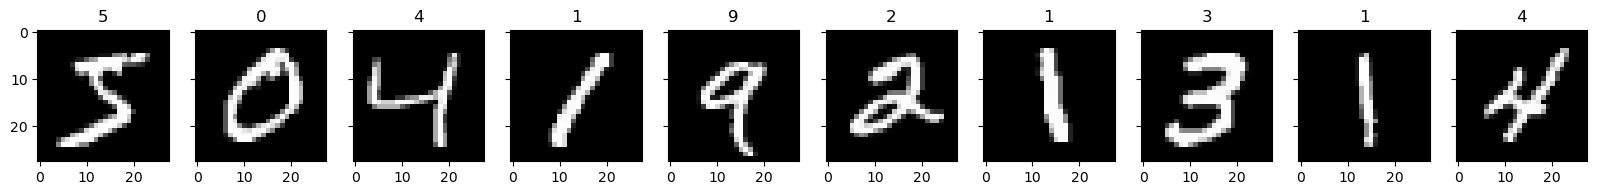

In [55]:

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()

In [56]:
y_train.shape,y_test.shape,x_train.shape,x_test.shape

((60000,), (10000,), (60000, 28, 28), (10000, 28, 28))

In [57]:
# Reshape the images to include a channel dimension (28, 28, 1) suitable for a CNN.
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [58]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [59]:
 # Normalize the pixel values of the images to the range [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [60]:
# - Convert the labels to one-hot encoding using the to_categorical function.

import tensorflow
from tensorflow.keras.utils import to_categorical
y_train =to_categorical (y_train , 10)
y_test  = to_categorical (y_test ,10)

In [31]:
y_train

array([[[[[[[[0., 1., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             ...,
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.]],

            [[1., 0., 0., ..., 0., 0., 0.],
             [0., 1., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             ...,
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.]]],


           [[[1., 0., 0., ..., 0., 0., 0.],
             [0., 1., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             ...,
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.]],

            [[0., 1., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             [1., 0., 0., ..., 0., 0., 0.],
             .

2. Model Architecture:
 - Create a Convolutional Neural Network with the following layers:


In [61]:
model=Sequential()

In [76]:




from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First convolutional layer with at least 32 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# First max pooling layer with a pool size of 2x2.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with at least 64 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(64, (3, 3), activation='relu'))

# Second max pooling layer with a pool size of 2x2.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with at least 128 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(128, (3, 3), activation='relu'))

# Fourth convolutional layer with at least 256 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(Flatten())
# first  fully connected layer with 128 units and ReLU activation
model.add(Dense(128,activation="relu"))
#. A second fully connected layer with 50 units and ReLU activation.
model.add(Dense(50,activation="relu"))
#. A third fully connected layer with 50 units and ReLU activation.
model.add(Dense(50,activation="relu"))
# An output layer with 10 units and softmax activation for classification
model.add(Dense(10, activation="softmax"))



# Print the model summary to check the architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

3. Training and Evaluation:
 - Train the model using the Adam optimizer and categorical cross-entropy loss.
 - Evaluate the model on the test set and report the accuracy.

In [77]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8830 - loss: 0.3521 - val_accuracy: 0.9812 - val_loss: 0.0555
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9837 - loss: 0.0550 - val_accuracy: 0.9887 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9887 - loss: 0.0383 - val_accuracy: 0.9895 - val_loss: 0.0360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9919 - loss: 0.0290 - val_accuracy: 0.9875 - val_loss: 0.0449
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9927 - loss: 0.0258 - val_accuracy: 0.9902 - val_loss: 0.0386


In [74]:
# Evaluate the Model on the Test Set
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)
print('test Loss:',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1160 - loss: 2.3008
Test accuracy: 0.11349999904632568
test Loss: 2.301051139831543


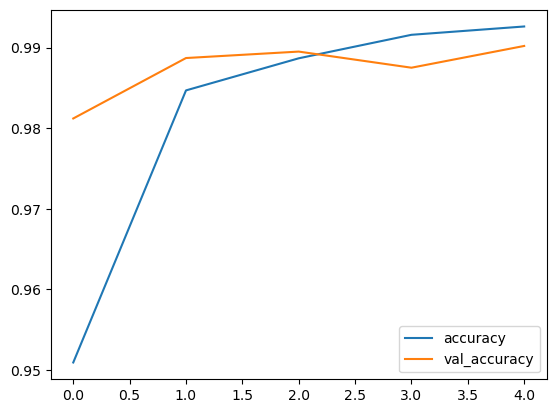

In [80]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.legend()